In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + (3*X) + np.random.randn(100,1)

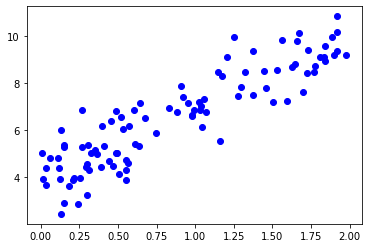

In [3]:
plt.plot(X,y,'o',color = 'blue')
plt.show()

In [4]:
# Concatenating ones to the left side of X. Why? - y = theta0 * 1 + theta1*x1 ....
X_b = np.c_[np.ones((100, 1)), X] 

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.9189314 ],
       [3.00961136]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [8]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [9]:
y_predict = X_new_b.dot(theta_best)

In [10]:
y_predict

array([[3.9189314 ],
       [9.93815412]])

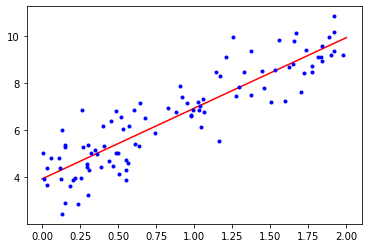

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [12]:
## Using scikit learn to perform linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9189314]), array([[3.00961136]]))

In [13]:
lin_reg.predict(X_new)

array([[3.9189314 ],
       [9.93815412]])

In [14]:
## Calculating Pseudo Inverse.
np.linalg.pinv(X_b).dot(y)

array([[3.9189314 ],
       [3.00961136]])

In [15]:
## testing out gradient descent - delta vector calculation and movement
eta = 0.1  # learning rate 
n_iterations = 1000 
m = 100 
theta = np.random.randn(2,1)  # random initialization 
theta

array([[1.19207645],
       [0.17458255]])

In [16]:
for iteration in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

In [17]:
gradients

array([[-2.02504680e-15],
       [ 1.99840144e-15]])

In [18]:
theta

array([[3.9189314 ],
       [3.00961136]])

In [19]:
### Implmenting Stochastic Gradient Descent

n_epochs = 50 
t0, t1 = 5, 50  # learning schedule hyperparameters 

def learning_schedule(t): 
    return t0 / (t + t1) 
theta = np.random.randn(2,1)  # random initialization 
for epoch in range(n_epochs): 
    for i in range(m): 
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients

In [20]:
theta

array([[3.87487593],
       [2.98259047]])

In [21]:
### SGD with Scikit Learn

from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.85247149]), array([2.97394016]))

In [23]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-2.626155 ,  6.8966901])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98255878]), array([[0.95191177, 0.50719537]]))

### Learning Curves

In [26]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
def plot_learning_curves(model, X, y): 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], [] 
    for m in range(1, len(X_train)): 
        model.fit(X_train[:m], y_train[:m]) 
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

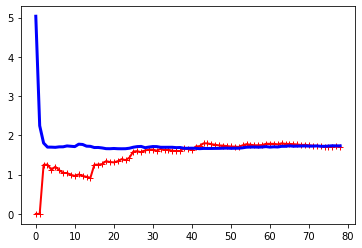

In [27]:
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

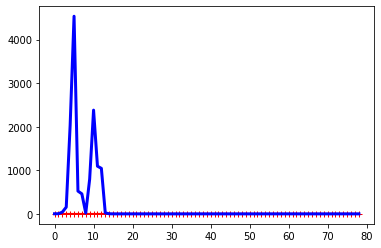

In [28]:
from sklearn.pipeline import Pipeline 
polynomial_regression = Pipeline([ ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
                                  ("lin_reg", LinearRegression()), ])
plot_learning_curves(polynomial_regression, X, y)

In [29]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.1048039]])

In [30]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.06957792])

In [31]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.0619857])

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.06565768])

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone # prepare the data 
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
                        ("std_scaler", StandardScaler())]) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
X_train_poly_scaled = poly_scaler.fit_transform(X_train) 
X_val_poly_scaled = poly_scaler.transform(X_val) 
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf") 
best_epoch = None 
best_model = None 
for epoch in range(1000): 
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) 
    val_error = mean_squared_error(y_val, y_val_predict) 
    if val_error < minimum_val_error: 
        minimum_val_error = val_error 
        best_epoch = epoch 
        best_model = clone(sgd_reg)

c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

In [57]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [61]:
X = iris['data'][:, 3:]  # petal width 
y = (iris["target"] == 2).astype(np.int32)

In [62]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression() 
log_reg.fit(X, y)

LogisticRegression()

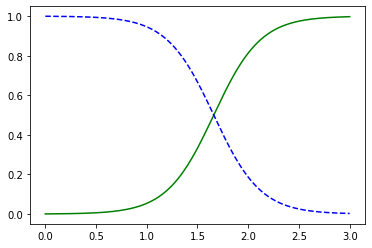

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [65]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax

In [67]:
X = iris["data"][:, (2, 3)]  # petal length, petal width 
y = iris["target"] 
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [68]:
softmax_reg.predict([[5, 2]])

array([2])

In [69]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])